# Clustering with k-Means
## Tetra-Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import numpy as np

In [2]:
data = loadmat("../data/tetra.mat")

X_tetra = data["data"]
Y_tetra = data["class"]

In [3]:
print("X:", X_tetra.shape, "\tY:", Y_tetra.shape)

X: (400, 3) 	Y: (400, 1)


### Data Visualisation

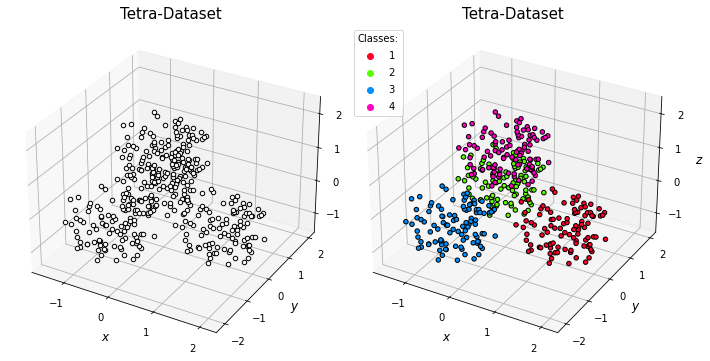

In [4]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(12, 10))

#### First Plot (left side) ####
ax = fig.add_subplot(1, 2, 1, projection="3d")

ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
           zs=X_tetra[:, 2], c="white",
           edgecolor="k", depthshade=False)

ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("Tetra-Dataset", size=15)

#### Second Plot (right side) ####
ax = fig.add_subplot(1, 2, 2, projection="3d")
scatter = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_tetra,
                     edgecolor="k", depthshade=False,
                     cmap=cm.gist_rainbow)

ax.legend(*scatter.legend_elements(), 
          title="Classes:", loc="upper left")

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("Tetra-Dataset", size=15)

plt.subplots_adjust(wspace=0.04)
#plt.savefig("tetra_data.pdf",dpi = 300, bbox_inches="tight")
plt.show()

### Principal Component Analysis

In [5]:
# Principal Component Analysis (PCA)

pca = PCA(n_components=2)

X_tetra_low = pca.fit_transform(X_tetra)

In [6]:
X_tetra_low.shape

(400, 2)

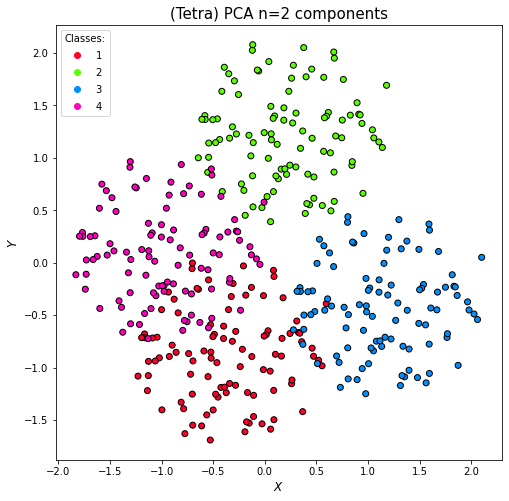

In [7]:
import matplotlib.cm as cm

# Have a look at the PCA results

plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_tetra_low[:, 0], X_tetra_low[:, 1], 
                      c=Y_tetra, edgecolor="black",
                      cmap=cm.gist_rainbow)
plt.legend(*scatter.legend_elements(), 
           title="Classes:", loc="upper left")
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("(Tetra) PCA n=2 components", size=15)
#plt.savefig("tetra_pca.pdf", dpi = 300, bbox_inches="tight")
plt.show()

### k-Means n=3 cluster

In [8]:
n = 3
kmeans1 = KMeans(n_clusters=n, init="random").fit(X_tetra)
kmeans2 = KMeans(n_clusters=n, init="random").fit(X_tetra)

centroids1 = kmeans1.cluster_centers_
Y_kmean1 = kmeans1.labels_
Y_kmean1 += 1

centroids2 = kmeans2.cluster_centers_
Y_kmean2 = kmeans2.labels_
Y_kmean2 += 1

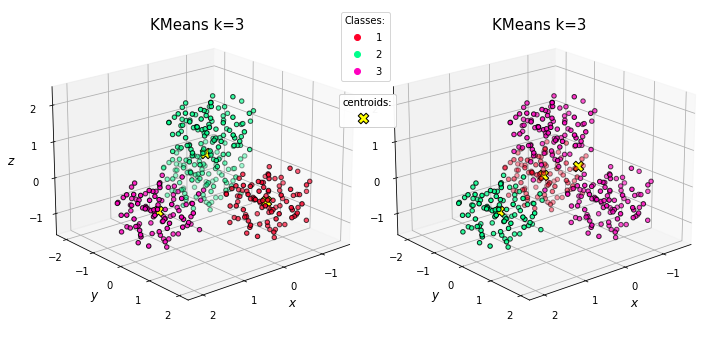

In [9]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(12, 10))

#### Plot right side ####
ax = fig.add_subplot(1, 2, 2, projection="3d", elev=20, azim=50)
# Datapoints plot
scatter1 = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_kmean2,
                     edgecolor="k", cmap=cm.gist_rainbow)

# Centroids plot
scatter2 = ax.scatter(centroids2[:,0], centroids2[:,1], centroids2[:,2],
                      c="yellow", marker="X", s=110, edgecolor="k",
                      depthshade=False)

ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("KMeans k={}".format(n), size=15, y=0.99)

#### Plot left side ####

ax = fig.add_subplot(1, 2, 1, projection="3d", elev=20, azim=50)

# Datapoints plot
scatter1 = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_kmean1,
                     edgecolor="k", cmap=cm.gist_rainbow)
# Datapoint legend
legend1 = ax.legend(*scatter1.legend_elements(),
                    title="Classes:", loc="upper right",
                    bbox_to_anchor=[1.1, 1])
ax.add_artist(legend1)

# Centroids plot
scatter2 = ax.scatter(centroids1[:,0], centroids1[:,1], centroids1[:,2],
                      c="yellow", marker="X", s=110, edgecolor="k",
                      depthshade=False)

# Centroid legend
legend2 = ax.legend(["_",""], loc="upper right",
                    title="centroids:",
                    bbox_to_anchor=[1.12, 0.75])
ax.add_artist(legend2)

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("KMeans k={}".format(n), size=15, y=0.99)

plt.subplots_adjust(wspace=0.04)
plt.savefig("tetra_3.pdf",dpi = 300, bbox_inches="tight")
plt.show()

### How to get the right number of clusters?

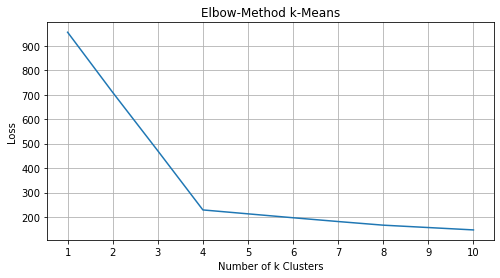

In [10]:
# Elbow method
loss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tetra)
    loss.append(kmeans.inertia_)
    

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), loss)
plt.xticks(range(1, 11))
plt.xlabel("Number of k Clusters")
plt.title("Elbow-Method k-Means")
plt.ylabel("Loss")
plt.grid()
#plt.savefig("elbow-tetra.pdf", dpi = 300, bbox_inches="tight")
plt.show()


### k-Means n=4 cluster

In [11]:
n = 4
kmeans = KMeans(n_clusters=n).fit(X_tetra)

In [12]:
centroids = kmeans.cluster_centers_
Y_kmean = kmeans.labels_
Y_kmean += 1

centroids.shape

(4, 3)

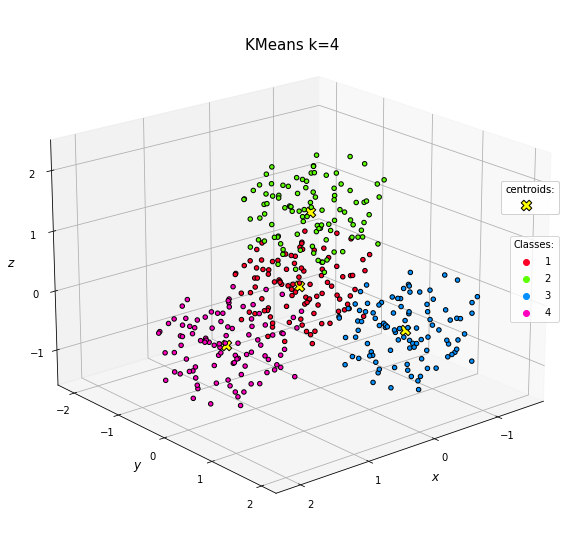

In [13]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d",elev=20, azim=50)

# Datapoints plot
scatter1 = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_kmean,
                     edgecolor="k", depthshade=False,
                     cmap=cm.gist_rainbow)
# Datapoint legend
legend1 = ax.legend(*scatter1.legend_elements(), 
                    title="Classes:", loc="right")
ax.add_artist(legend1)

# Centroids plot
scatter2 = ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
                      c="yellow", marker="X", s=110, edgecolor="k",
                      depthshade=False)

# Centroid legend
legend2 = ax.legend(["_",""], loc="right",
                    title="centroids:",
                    bbox_to_anchor=[1, 0.65])
ax.add_artist(legend2)

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("KMeans k={}".format(n), size=15, y=0.99)

#plt.savefig("tetra_kmeans_3_2.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [14]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_tetra, Y_kmean)

cm

array([[  0,   0,   0, 100],
       [  0,   0, 100,   0],
       [100,   0,   0,   0],
       [  0, 100,   0,   0]])